
# *   Sanjana Chalavadi
# PHASE 2 - Modelling
---





In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sns
import geopy
import datetime
import missingno as msno
from plotly.offline import iplot, init_notebook_mode

In [ ]:
#creating an initial list for listing all the files
files=['uber-raw-data-apr14.csv','uber-raw-data-may14.csv',
           'uber-raw-data-jun14.csv','uber-raw-data-jul14.csv',
           'uber-raw-data-aug14.csv','uber-raw-data-sep14.csv']

In [ ]:
# Merging all the 6 months of data that was available in individual files
uber_data = pd.DataFrame()
for month in files:
    month_df = pd.read_csv(month,encoding='utf-8')
    uber_data = pd.concat([uber_data,month_df])


Basic Data Exploration for Modelling - majority cleaning and EDA done in Phase 1

In [ ]:
#Data exploration
uber_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
uber_data.shape

(4534327, 4)

In [ ]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [ ]:
#duplicate values
uber_data[uber_data.duplicated(keep=False)]

,Date/Time,Lat,Lon,Base
43,4/1/2014 5:44:00,40.7430,-74.0301,B02512
44,4/1/2014 5:44:00,40.7430,-74.0301,B02512
127,4/1/2014 7:25:00,40.7805,-73.9481,B02512
128,4/1/2014 7:25:00,40.7805,-73.9481,B02512
184,4/1/2014 8:25:00,40.7620,-73.9787,B02512
...,...,...,...,...
1028065,9/30/2014 22:39:00,40.7714,-73.9502,B02764
1028094,9/30/2014 22:46:00,40.7277,-73.9893,B02764
1028095,9/30/2014 22:46:00,40.7277,-73.9893,B02764
1028099,9/30/2014 22:47:00,40.7212,-74.0048,B02764


About 165K rows of duplicate values. Visually in the table displayed we can see that its exactly two rows of same values but it could also be that the same base has multiple vehicles that went to pick up at the same exact spot

confirming our above assumption. should we drop them?

In [ ]:
print("Correct number of rows after dropping one copy(assuming it repeats exactly once): ", 4534327-(164984/2))

Correct number of rows after dropping one copy(assuming it repeats exactly once):  4451835.0


In [ ]:
print("Percent of Duplicate Values: ", (164984/4534327)*100)

Percent of Duplicate Values:  3.6385554019372663


In [ ]:
uber_data = uber_data.drop_duplicates(keep='first')

In [ ]:
uber_data.shape

(4451746, 4)

Looks like our assumption could be right because the number is close, differing only by 89 rows for such a large dataset. For now we are proceeding by dropping the duplicate values

Checking the range of the data, Latitude must be between -90 and 90, Longitude must be between -180 and 180

In [ ]:
print("Valid Latitudes:" , len(uber_data.loc[uber_data.loc[:, 'Lat'].between(-90, 90), : ]))
print("Valid Longitudes:" , len(uber_data.loc[uber_data.loc[:, 'Lon'].between(-180, 180), : ]))
print("Total Number of actual values: ",uber_data.shape[0] )

Valid Latitudes: 4451746
Valid Longitudes: 4451746
Total Number of actual values:  4451746


#In the source dataset, its mentioned there are 8 base codes
'''B02512 : Unter
B02598 : Hinter
B02617 : Weiter
B02682 : Schmecken
B02764 : Danach-NY
B02765 : Grun
B02835 : Dreist
B02836 : Drinnen '''

In [ ]:
print(uber_data['Base'].unique())
uber_data['Base'].value_counts()

['B02512' 'B02598' 'B02617' 'B02682' 'B02764']


B02617    1417983
B02598    1379578
B02682    1198901
B02764     254931
B02512     200353
Name: Base, dtype: int64

Unique values before adding columns

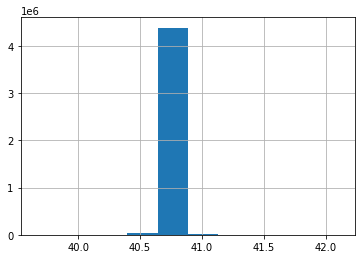

In [ ]:
uber_data['Lat'].hist()

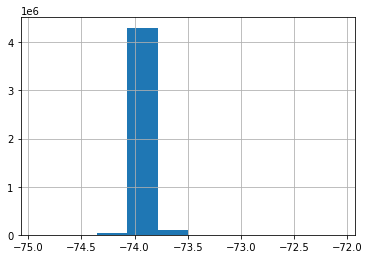

In [ ]:
uber_data['Lon'].hist()

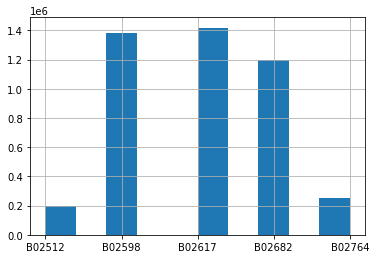

In [ ]:
uber_data['Base'].hist()

extracting and making new columns for improved analysis

In [ ]:
month = []
day = []
year = []
hrs = []
day_of_week = []
day_week_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

dt_time = uber_data['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    month.append(dt_time[i].split(" ")[0].split("/")[0])

dt_time = uber_data['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    day.append(dt_time[i].split(" ")[0].split("/")[1])

dt_time = uber_data['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    year.append(dt_time[i].split(" ")[0].split("/")[2])

dt_time = uber_data['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    hrs.append(dt_time[i].split(" ")[1].split(":")[0])

for i in range(len(month)):
    day_of_week.append(day_week_list[datetime.date( int(year[i]),
                                        int(month[i]),
                                        int(day[i])).weekday()
                        ])

uber_data['Month'] = month
uber_data['Day'] = day
uber_data['Year'] = year
uber_data['Hrs'] = hrs
uber_data['Day_of_week'] = day_of_week

In [ ]:
uber_data.dtypes

Date/Time       object
Lat            float64
Lon            float64
Base            object
Month           object
Day             object
Year            object
Hrs             object
Day_of_week     object
dtype: object

we wont be able to analyse for objects so setting them to appropriate data types

In [ ]:
for col in ['Month', 'Day', 'Year','Hrs']:
    uber_data[col] = uber_data[col].astype(str).astype(int)

In [ ]:
uber_data['Day_of_week'] = uber_data['Day_of_week'].astype(str)

In [ ]:
uber_data.dtypes

Date/Time       object
Lat            float64
Lon            float64
Base            object
Month            int64
Day              int64
Year             int64
Hrs              int64
Day_of_week     object
dtype: object

For in depth analysis, we will add one more column

In [ ]:
uber_data['week_day_type'] = ['weekend' if (x == 'Saturday' or x == 'Sunday') else 'weekday' for x in uber_data['Day_of_week']]

In [ ]:
print(uber_data['Month'].value_counts())
print(uber_data['Day'].value_counts())
print(uber_data['Year'].value_counts())
print(uber_data['Hrs'].value_counts())
print(uber_data['Day_of_week'].value_counts())

9    1004099
8     813393
7     781969
6     653158
5     642360
4     556767
Name: Month, dtype: int64
30    164040
12    157725
16    156020
13    153991
23    152976
9     152500
15    150892
26    150403
19    150226
17    149828
25    149783
10    149715
18    148509
29    146267
11    146135
5     144547
22    144160
8     143530
27    142815
24    141528
20    141363
7     140983
2     140767
3     140688
21    138593
28    138413
4     138361
14    137656
6     137313
1     125282
31     76737
Name: Day, dtype: int64
2014    4451746
Name: Year, dtype: int64
17    330024
18    318584
16    307810
19    288836
20    279309
21    276183
15    270636
22    237424
14    226513
13    192427
7     189725
8     187166
12    167361
23    166077
11    162687
9     157316
10    156455
6     140599
0     101876
5      82350
1      65913
4      54246
3      47331
2      44898
Name: Hrs, dtype: int64
Thursday     741372
Friday       727532
Wednesday    683604
Tuesday      651753
Saturday    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



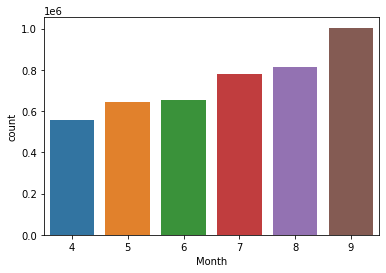

In [ ]:
sns.countplot(uber_data['Month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31')]

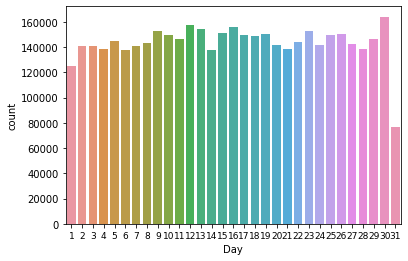

In [ ]:
d = sns.countplot(uber_data['Day'])
d.set_xticklabels(d.get_xticklabels(), fontsize=9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



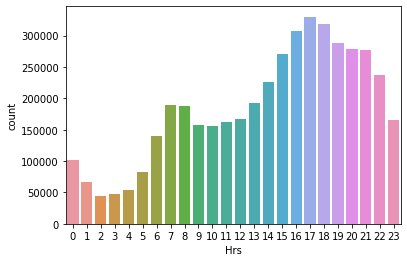

In [ ]:
sns.countplot(uber_data['Hrs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



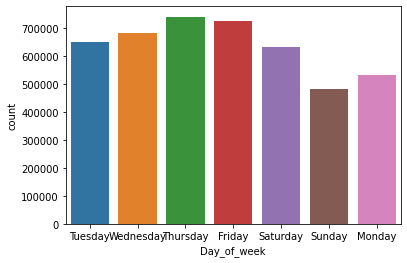

In [ ]:
sns.countplot(uber_data['Day_of_week'])

# **Gaussian Mixture Model**

For Gaussina mixture modeling, i will use april month's data as using the whole data is computationally intensive

In [ ]:
uber_data.head()

,Date/Time,Lat,Lon,Base,Month,Day,Year,Hrs,Day_of_week,week_day_type
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4,1,2014,0,Tuesday,weekday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,4,1,2014,0,Tuesday,weekday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,4,1,2014,0,Tuesday,weekday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,4,1,2014,0,Tuesday,weekday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,4,1,2014,0,Tuesday,weekday


In [ ]:
april_df = uber_data[(uber_data.Month == 4)]

In [ ]:
april_df.shape

(556767, 10)

In [ ]:
april_df.head()

,Date/Time,Lat,Lon,Base,Month,Day,Year,Hrs,Day_of_week,week_day_type
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4,1,2014,0,Tuesday,weekday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,4,1,2014,0,Tuesday,weekday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,4,1,2014,0,Tuesday,weekday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,4,1,2014,0,Tuesday,weekday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,4,1,2014,0,Tuesday,weekday


Converting the columns to float as GMM needs input in float format

In [ ]:
day_week = {"Monday":1, "Tuesday":2 , "Wednesday":3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
week_type = {"weekday": 0, "weekend": 1}
april_df["Day_of_week"] = april_df["Day_of_week"].map(day_week)
april_df["week_day_type"] = april_df["week_day_type"].map(week_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
april_df.head()

,Date/Time,Lat,Lon,Base,Month,Day,Year,Hrs,Day_of_week,week_day_type
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4,1,2014,0,2,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,4,1,2014,0,2,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,4,1,2014,0,2,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,4,1,2014,0,2,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,4,1,2014,0,2,0


In [ ]:
clus = april_df[['Lat', 'Lon','Month','Day','Hrs','Day_of_week','week_day_type']]
clus.dtypes

Lat              float64
Lon              float64
Month              int64
Day                int64
Hrs                int64
Day_of_week        int64
week_day_type      int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

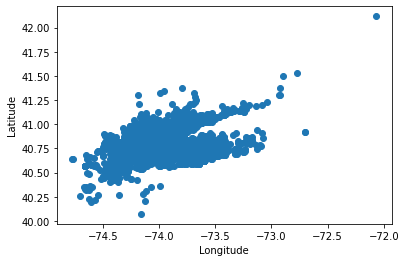

In [ ]:
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(x=clus['Lon'], y=clus['Lat'])
plt.show()

In [ ]:
#required libraries for GMM
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
import random
random.seed(42)
subset_clus = clus.sample(n = 15000, replace = False, random_state=42)

Silhoutte Method for Determining number of Clusters

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2,random_state=0).fit(subset_clus)
        labels=gmm.predict(subset_clus)
        sil=metrics.silhouette_score(subset_clus, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Plot", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")

In [ ]:
from sklearn import mixture #Gaussian Mixture Modelling
from sklearn.mixture import GaussianMixture
clf_prep = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf_prep.fit(clus)

GaussianMixture(n_components=5)

In [ ]:
label_gmm_prep = clf_prep.predict(clus)

In [ ]:
#sample_ value prediction
#['Lat', 'Lon','Month','Day','Hrs','Day_of_week','week_day_type']
show_cluster = clf_prep.predict([[40.6463,-73.7896,4,1,2,2,0]])
#40.6463	-73.7896	4	1	2	2	0
show_cluster

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names



array([2])

In [ ]:
print(clf_prep.predict([[40.6463,-73.7896,4,1,2,2,0]]))

[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names



In [ ]:
df_gmm = clus.copy()
df_gmm['Clusters'] = label_gmm_prep
df_gmm.head(20)

,Lat,Lon,Month,Day,Hrs,Day_of_week,week_day_type,Clusters
0,40.7690,-73.9549,4,1,0,2,0,0
1,40.7267,-74.0345,4,1,0,2,0,2
2,40.7316,-73.9873,4,1,0,2,0,0
3,40.7588,-73.9776,4,1,0,2,0,0
4,40.7594,-73.9722,4,1,0,2,0,0
5,40.7383,-74.0403,4,1,0,2,0,2
6,40.7223,-73.9887,4,1,0,2,0,0
7,40.7620,-73.9790,4,1,0,2,0,0
8,40.7524,-73.9960,4,1,0,2,0,0
9,40.7575,-73.9846,4,1,1,2,0,0


In [ ]:
df_gmm['Clusters'].unique()

array([0, 2, 3, 4, 1])

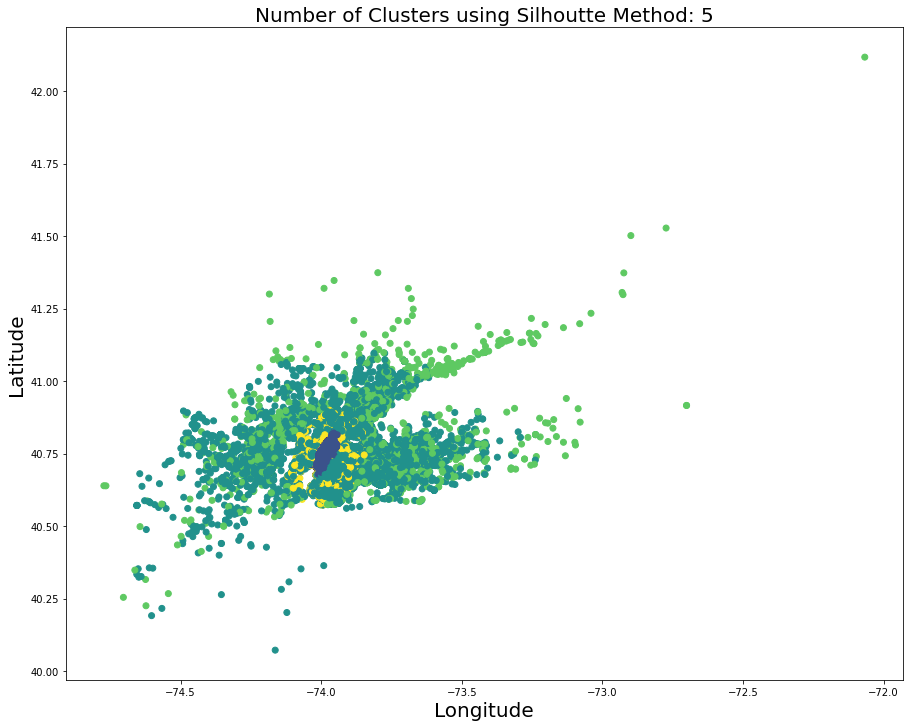

In [ ]:
plt.figure(figsize=(15, 12))
plt.title('Number of Clusters using Silhoutte Method: 5',size=20)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.scatter(df_gmm['Lon'],df_gmm['Lat'], c = label_gmm_prep, cmap='viridis');

In [ ]:
plt.savefig('gmm_read.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(df_gmm['Clusters'])

In [ ]:
cluster_df= pd.DataFrame(df_gmm[['Clusters','Day_of_week']].value_counts()).reset_index()
cluster_df.columns=['Clusters','Day_of_week','Count']

In [ ]:
by_cluster=pe.bar(cluster_df,
            x='Clusters',
            y='Count',
            color='Day_of_week',
            color_discrete_sequence= pe.colors.sequential.Plasma_r)
by_cluster.update_layout(title_text='Trips by day of the week and clusters', title_x=0.5)
by_cluster.show()

# **Save Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(clf_prep,'uber_rides.sav')

['uber_rides.sav']

**Load Model**

In [ ]:
model = joblib.load('uber_rides.sav')

**Testing the model on Custom Data**

In [ ]:
print(model.predict([[40.6463,-73.7896,4,1,2,2,0]]))

[3]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but GaussianMixture was fitted with feature names



Cross checking the number of cluster choice with the BIC Method

In [ ]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(subset_clus)
        tmp_bic.append(gmm.bic(subset_clus))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

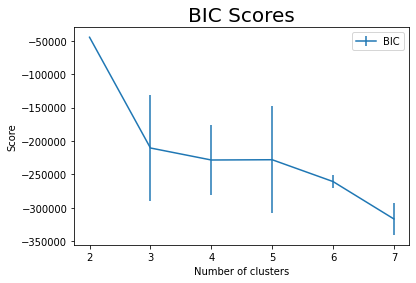

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.legend()

You can notice that there is a plateau towards 4 and 5 but checking gradient will give more clarity

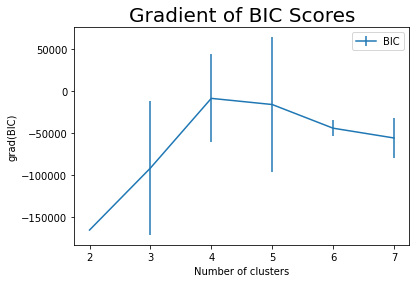

In [ ]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

The gradient (should be high) is near 4 and 5 , we can go ahead with 5 which aligns with our pick from silhoutte method. So, in conclusion, 5 clusters seem like a right option

Checking the clusters using the folium map

In [ ]:
'''import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

latitude = 40.71600413400166
longitude = -73.98971408426613

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster in zip(df_gmm['Lat'], df_gmm['Lon'],
                                            df_gmm['Clusters']):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip =  str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)

map_clusters'''


"import folium\nimport matplotlib.pyplot as plt\nimport matplotlib.cm as cm\nimport matplotlib.colors as colors\n\nlatitude = 40.71600413400166\nlongitude = -73.98971408426613\n\nmap_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)\n\n# set color scheme for the clusters\nx = np.arange(4)\nys = [i + x + (i*x)**2 for i in range(4)]\ncolors_array = cm.rainbow(np.linspace(0, 1, len(ys)))\nrainbow = [colors.rgb2hex(i) for i in colors_array]\n\n# add markers to the map\nmarkers_colors = []\nfor lat, lng, cluster in zip(df_gmm['Lat'], df_gmm['Lon'],  \n                                            df_gmm['Clusters']):\n    folium.vector_layers.CircleMarker(\n        [lat, lng],\n        radius=5,\n        #popup=label,\n        tooltip =  str(cluster),\n        color=rainbow[cluster-1],\n        fill=True,\n        fill_color=rainbow[cluster-1],\n        fill_opacity=0.9).add_to(map_clusters)\n       \nmap_clusters"

In [ ]:
'''map_clusters'''

'map_clusters'

# **Kmeans Clustering**

In [ ]:
#importing required libraries for Kmeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
clus_kmeans = april_df[['Lat', 'Lon']]
clus_kmeans.dtypes

Lat    float64
Lon    float64
dtype: object

In [ ]:
#randomly subsetting because chosing the entire dataset is taking lot of time
import random
random.seed(42)
subset_clus = clus_kmeans.sample(n = 15000, replace = False)

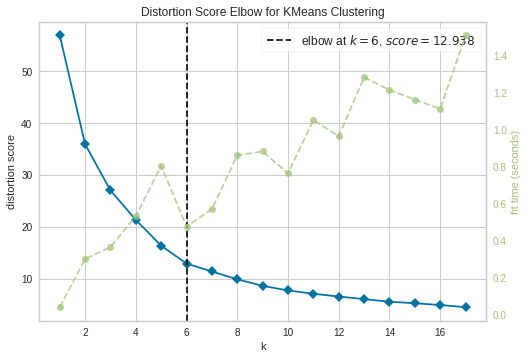

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 18)) #k = 1 to 17
visualizer.fit(subset_clus)
visualizer.show()

from the above plot using elbow method, k means shows us as 6 clusters for optimal pick (here we chose just lat and long as our features)

In [ ]:
kmeans = KMeans(n_clusters = 6, random_state = 0) #k = 5
kmeans.fit(subset_clus)

KMeans(n_clusters=6, random_state=0)

In [ ]:
#finding the centroids (step 2)
centroids = kmeans.cluster_centers_
centroids

array([[ 40.76571518, -73.97346727],
       [ 40.65935   , -73.7693429 ],
       [ 40.73133377, -73.99852251],
       [ 40.79725643, -73.87315144],
       [ 40.68932231, -73.96611247],
       [ 40.70646535, -74.20498583]])

In [ ]:
clocation = pd.DataFrame(centroids, columns = ['Latitude', 'Longitude'])

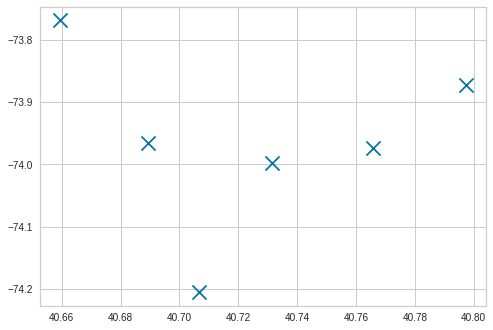

In [ ]:
#plotting the centroids
plt.scatter(clocation['Latitude'], clocation['Longitude'], marker = "x", s = 200)

In [ ]:
#plotting centroids on folium map
import folium
centroid_k_ori = clocation.values.tolist()
p = [0,0]
map_k_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_k_ori)):
    p[0] = centroid_k_ori[point][0]
    p[1] = centroid_k_ori[point][1]
#     print(p)
    folium.Marker(p, popup = p).add_to(map_k_ori)

map_k_ori

In [ ]:
labels = kmeans.predict(clus_kmeans)
labels

array([0, 2, 2, ..., 2, 4, 4], dtype=int32)

In [ ]:
df_new = clus_kmeans.copy()
df_new['Clusters'] = labels
df_new

,Lat,Lon,Clusters
0,40.7690,-73.9549,0
1,40.7267,-74.0345,2
2,40.7316,-73.9873,2
3,40.7588,-73.9776,0
4,40.7594,-73.9722,0
...,...,...,...
564511,40.7640,-73.9744,0
564512,40.7629,-73.9672,0
564513,40.7443,-73.9889,2
564514,40.6756,-73.9405,4


In [ ]:
df_new['Clusters'].unique()

array([0, 2, 1, 4, 5, 3], dtype=int32)

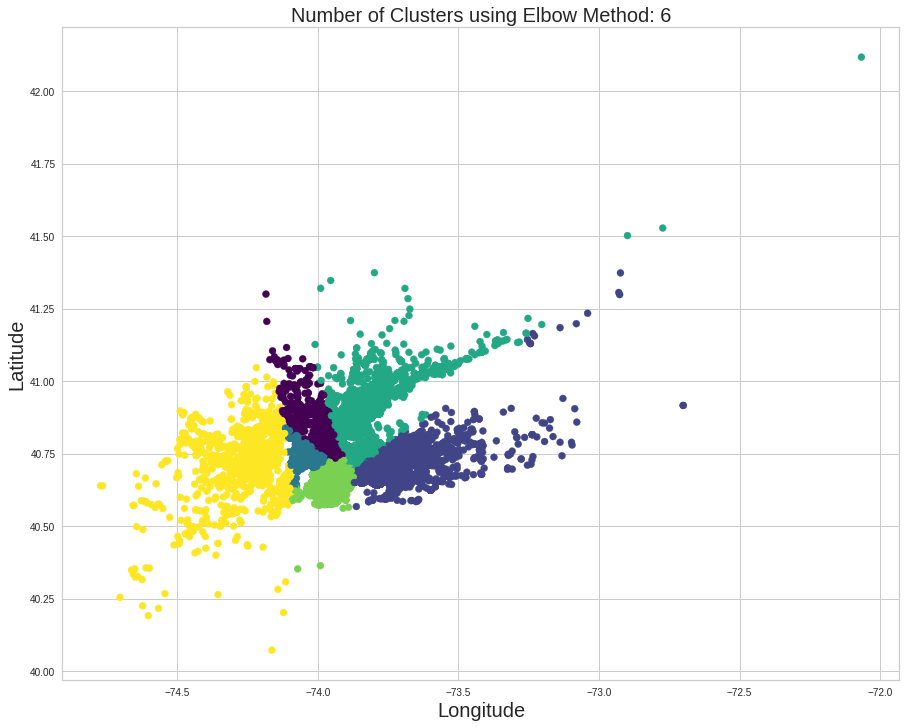

In [ ]:
plt.figure(figsize=(15, 12))
plt.title('Number of Clusters using Elbow Method: 6',size=20)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.scatter(df_new['Lon'],df_new['Lat'], c = labels, cmap='viridis');

In [ ]:
#printing the same above map in folium
'''import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.71600413400166, -73.98971408426613], zoom_start=10)
marker_cluster = MarkerCluster(
    name="clustered name",
).add_to(m)
#Printing clusters on map
for row in df_new.itertuples():
    #print(row)
    folium.Marker(location=[row.Lat,row.Lon], popup = labels).add_to(marker_cluster)

folium.LayerControl().add_to(m)

m'''

'import folium\nfrom folium.plugins import MarkerCluster\n\nm = folium.Map(location=[40.71600413400166, -73.98971408426613], zoom_start=10)\nmarker_cluster = MarkerCluster(\n    name="clustered name",\n).add_to(m)\n#Printing clusters on map\nfor row in df_new.itertuples():\n    #print(row)\n    folium.Marker(location=[row.Lat,row.Lon], popup = labels).add_to(marker_cluster)\n\nfolium.LayerControl().add_to(m)\n\nm'

# **Fuzzy algorithm: C Means**

In [ ]:
clus_fuz = april_df[['Lat', 'Lon']]

In [ ]:
clus_fuz.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


In [ ]:
#pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=21665b31201be3fe08cff6aa529431cb966b697ea5b3ac0f1983be1eafafd4ad
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy
from skfuzzy.cluster import cmeans, cmeans_predict
fpcs_ori = []

# n_cluster = 1 to 11
for n_cluster in range(1, 11):
    cntr, u, u0, d, jm, p, fpc_ori = cmeans(clus_fuz.T, n_cluster, 2 , error=0.01, maxiter=1000)
    fpcs_ori.append(fpc_ori)

Text(0, 0.5, 'Fuzzy partition coefficient')

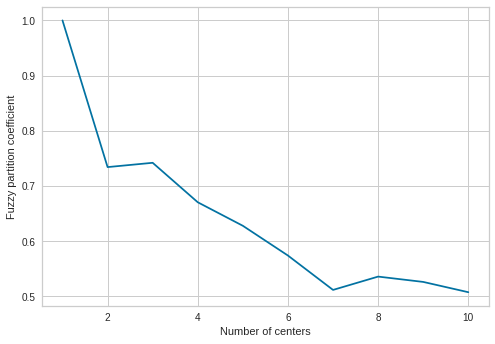

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.r_[1:11], fpcs_ori)
ax.set_xlabel("Number of centers")
ax.set_ylabel("Fuzzy partition coefficient")  #the larger its value, the better the partition result.

In [ ]:
cntr_ori, u_orig, _, _, _, _, _ = cmeans(clus_fuz.T, 5, 2 , error=0.01, maxiter=1000)

In [ ]:
u_ori, u0, d, jm, p, pc = cmeans_predict(clus_fuz.T, cntr_ori, 2 , error=0.01, maxiter=1000)

In [ ]:
centroids_fuz = cntr_ori
centroids_fuz

array([[ 40.77716055, -73.95562871],
       [ 40.6554964 , -73.78556432],
       [ 40.75589999, -73.98120818],
       [ 40.72742   , -73.99989652],
       [ 40.68987163, -73.97093035]])

In [ ]:
clocation_fuz = pd.DataFrame(centroids_fuz, columns = ['Latitude', 'Longitude'])
clocation_fuz

,Latitude,Longitude
0,40.777161,-73.955629
1,40.655496,-73.785564
2,40.755900,-73.981208
3,40.727420,-73.999897
4,40.689872,-73.970930


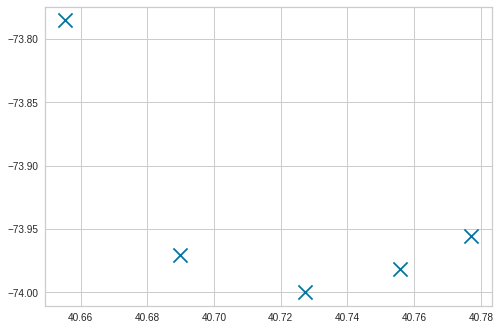

In [ ]:
plt.scatter(clocation_fuz['Latitude'], clocation_fuz['Longitude'], marker = "x", s = 200)

In [ ]:
centroid_fuz = clocation_fuz.values.tolist()

map_fuz = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_fuz)):
    folium.Marker(centroid_fuz[point], popup = centroid_fuz[point]).add_to(map_fuz)

map_fuz

In [ ]:
label_fuz = np.argmax(u_ori, axis = 0)
label_fuz

array([0, 3, 3, ..., 2, 4, 4])

In [ ]:
df_new_fuz = clus_fuz.copy()
df_new_fuz['Clusters'] = label_fuz
df_new_fuz

,Lat,Lon,Clusters
0,40.7690,-73.9549,0
1,40.7267,-74.0345,3
2,40.7316,-73.9873,3
3,40.7588,-73.9776,2
4,40.7594,-73.9722,2
...,...,...,...
564511,40.7640,-73.9744,2
564512,40.7629,-73.9672,2
564513,40.7443,-73.9889,2
564514,40.6756,-73.9405,4


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



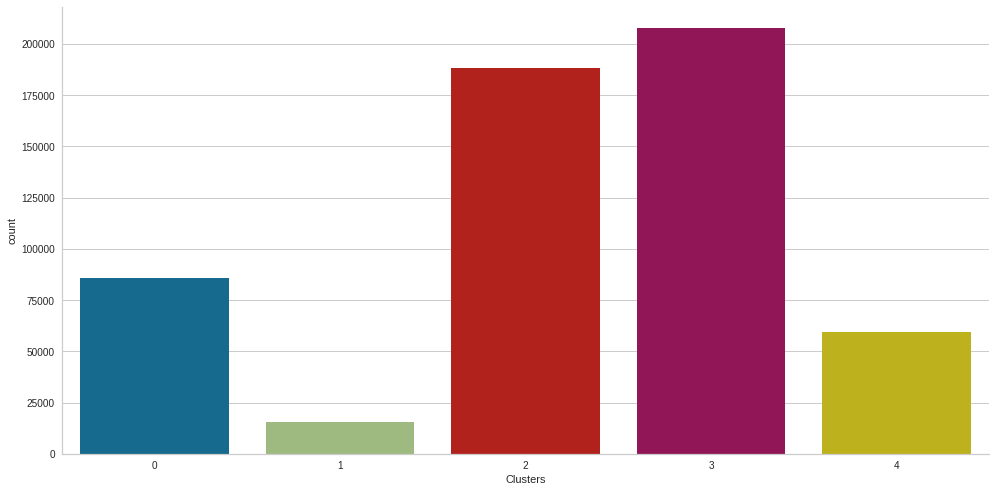

In [ ]:
import seaborn as sb
sb.factorplot(data = df_new_fuz, x = "Clusters", kind = "count", size = 7, aspect = 2)

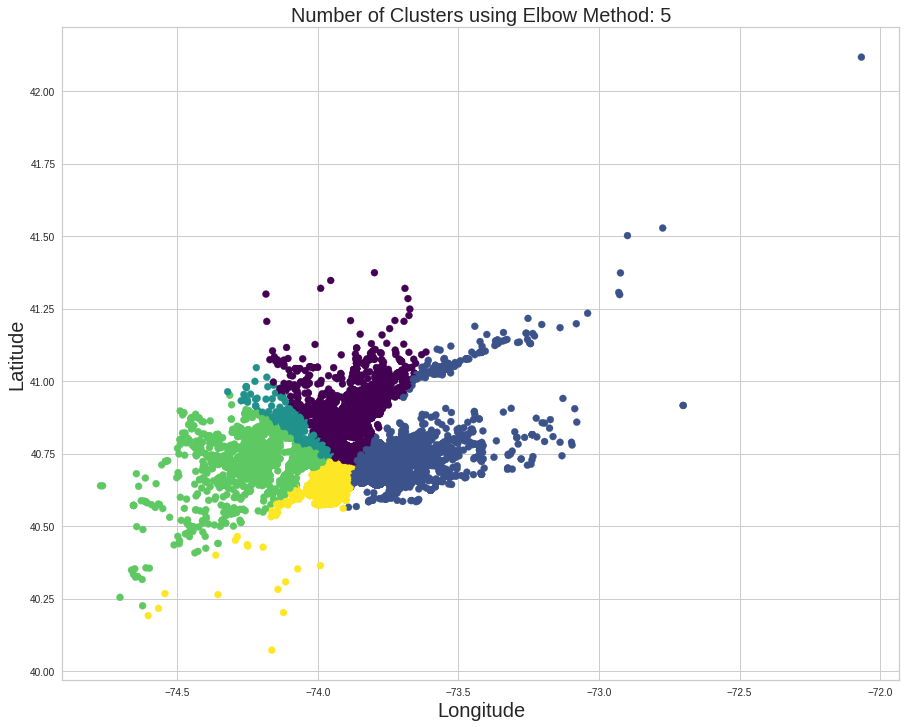

In [ ]:
plt.figure(figsize=(15, 12))
plt.title('Number of Clusters using Elbow Method: 5',size=20)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.scatter(df_new_fuz['Lon'], df_new_fuz['Lat'], c = label_fuz, cmap='viridis');

# **Artificial Neural Networks - Used for forecasting number of pickups**



In [ ]:
uber_data.head()

,Date/Time,Lat,Lon,Base,Month,Day,Year,Hrs,Day_of_week,week_day_type
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4,1,2014,0,Tuesday,weekday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,4,1,2014,0,Tuesday,weekday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,4,1,2014,0,Tuesday,weekday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,4,1,2014,0,Tuesday,weekday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,4,1,2014,0,Tuesday,weekday


In [ ]:
uber_data.dtypes

Date/Time         object
Lat              float64
Lon              float64
Base              object
Month              int64
Day                int64
Year               int64
Hrs                int64
Day_of_week       object
week_day_type     object
dtype: object

In [ ]:
uber_data.Timestamp = pd.to_datetime(uber_data['Date/Time'],format='%m/%d/%Y %H:%M:%S')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
uber_count = uber_data.groupby(pd.Grouper(key='Date/Time')).count()
print(uber_count.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260093 entries, 2014-04-01 00:11:00 to 2014-09-30 03:26:00
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Lat            260093 non-null  int64
 1   Lon            260093 non-null  int64
 2   Base           260093 non-null  int64
 3   Month          260093 non-null  int64
 4   Day            260093 non-null  int64
 5   Year           260093 non-null  int64
 6   Hrs            260093 non-null  int64
 7   Day_of_week    260093 non-null  int64
 8   week_day_type  260093 non-null  int64
dtypes: int64(9)
memory usage: 19.8 MB
None


In [ ]:
uber_count.head()

,Lat,Lon,Base,Month,Day,Year,Hrs,Day_of_week,week_day_type
Date/Time,,,,,,,,,
2014-04-01 00:11:00,6,6,6,6,6,6,6,6,6
2014-04-01 00:17:00,3,3,3,3,3,3,3,3,3
2014-04-01 00:21:00,5,5,5,5,5,5,5,5,5
2014-04-01 00:28:00,3,3,3,3,3,3,3,3,3
2014-04-01 00:33:00,5,5,5,5,5,5,5,5,5


In [ ]:
uber_count.drop(['Lon','Base','Month','Day','Year','Hrs','Day_of_week','week_day_type'],axis=1,inplace=True)

In [ ]:
uber_count.columns=['Pickups']
uber_count.head()

,Pickups
Date/Time,
2014-04-01 00:11:00,6
2014-04-01 00:17:00,3
2014-04-01 00:21:00,5
2014-04-01 00:28:00,3
2014-04-01 00:33:00,5


Training and testing

In [ ]:
train = uber_count[:][:234084]             #90% of 260093
test = uber_count[:][234085:]

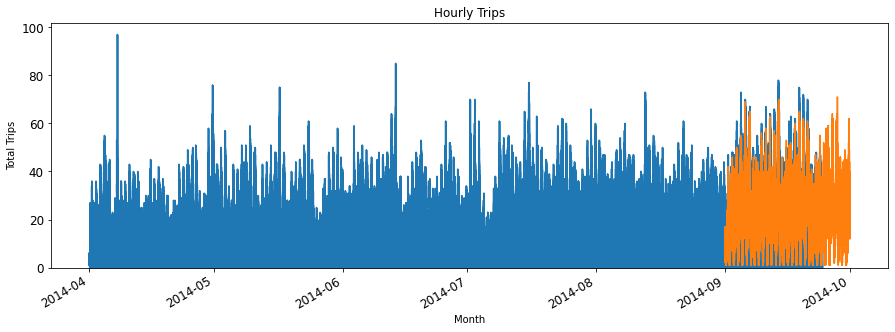

In [ ]:
train['Pickups'].plot(kind='area',figsize=(15,8), title= 'Hourly Trips', fontsize=14)
test['Pickups'].plot(figsize=(15,5), title= 'Hourly Trips', fontsize=12)
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.show()

In [ ]:
def test_stationary(timeseries):

    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()


    #Plot rolling Statistics
    act = plt.plot(timeseries, color = "blue", label = "Actual")
    mean = plt.plot(rolmean, color = "brown", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)

In [ ]:
from matplotlib.pylab import rcParams

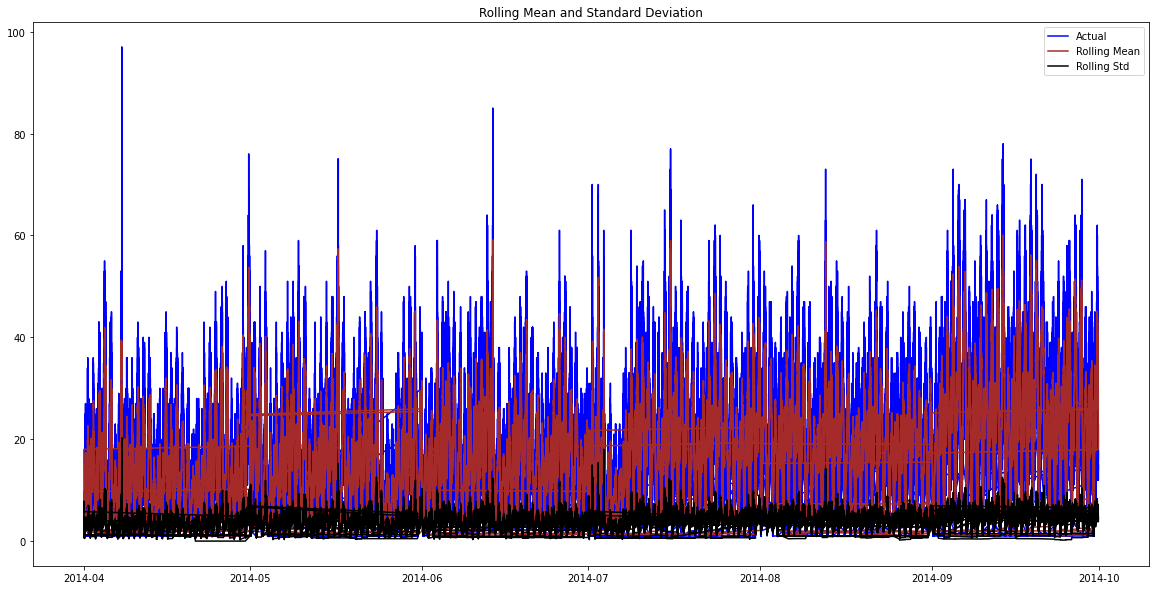

In [ ]:
rcParams['figure.figsize']=(20,10)
test_stationary(uber_count['Pickups'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [ ]:
model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/20
234083/234083 [==============================] - 333s 1ms/step - loss: 0.0026
Epoch 2/20
234083/234083 [==============================] - 330s 1ms/step - loss: 0.0027
Epoch 3/20
234083/234083 [==============================] - 325s 1ms/step - loss: 0.0027
Epoch 4/20
234083/234083 [==============================] - 323s 1ms/step - loss: 0.0027
Epoch 5/20
234083/234083 [==============================] - 334s 1ms/step - loss: 0.0027
Epoch 6/20
234083/234083 [==============================] - 324s 1ms/step - loss: 0.0027
Epoch 6: early stopping


Prediction

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.3f}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.3f}".format(rmse))

7316/7316 [==============================] - 9s 1ms/step
Train : 0.086
Test : 0.090


813/813 [==============================] - 1s 1ms/step


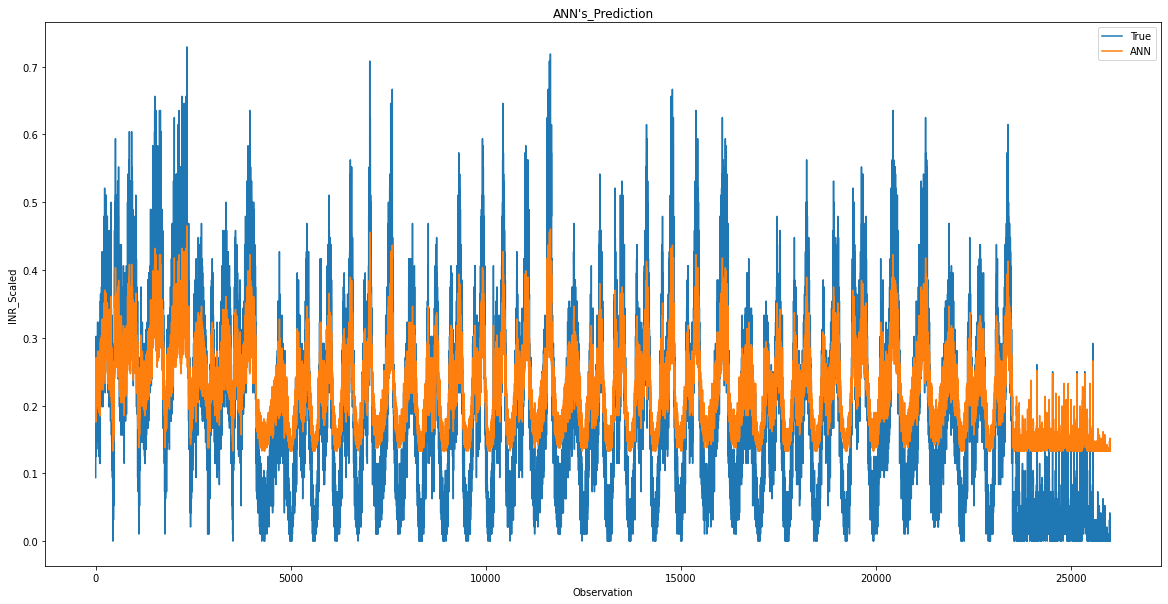

In [ ]:
y_pred_test_ANN = model.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_pred_test_ann)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

Accuracy Score of Model:  55.13 %


In [ ]:
score_ann= model.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

26007/26007 [==============================] - 36s 1ms/step - loss: 0.0081
ANN: 0.008118



# **Mutliple Linear Regression**

In [ ]:
uber_data.head()

,Date/Time,Lat,Lon,Base,Month,Day,Year,Hrs,Day_of_week,week_day_type
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4,1,2014,0,Tuesday,weekday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,4,1,2014,0,Tuesday,weekday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,4,1,2014,0,Tuesday,weekday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,4,1,2014,0,Tuesday,weekday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,4,1,2014,0,Tuesday,weekday


In [ ]:
#columns need --> Day and Month
new_df= pd.DataFrame(uber_data[['Date/Time']].value_counts()).reset_index()
new_df.columns=['Date/Time','Pickups']

In [ ]:
new_df.head()

,Date/Time,Pickups
0,4/7/2014 20:21:00,97
1,6/13/2014 18:03:00,85
2,4/7/2014 20:22:00,83
3,9/13/2014 18:44:00,78
4,9/13/2014 18:41:00,77


In [ ]:
new_df.shape

(260093, 2)

In [ ]:
#converting the date to correct format for futher manipulation
new_df['Date/Time']=pd.to_datetime(new_df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [ ]:
#adding columns month, weekday, day, hour as our lagged features
new_df['month']=new_df['Date/Time'].dt.month
new_df['weekday']=new_df['Date/Time'].dt.day_name()
new_df['day']=new_df['Date/Time'].dt.day
new_df['hour']=new_df['Date/Time'].dt.hour

In [ ]:
day_week = {"Monday":1, "Tuesday":2 , "Wednesday":3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
new_df["weekday"] = new_df["weekday"].map(day_week)

In [ ]:
new_df.head()

,Date/Time,Pickups,month,weekday,day,hour
0,2014-04-07 20:21:00,97,4,1,7,20
1,2014-06-13 18:03:00,85,6,5,13,18
2,2014-04-07 20:22:00,83,4,1,7,20
3,2014-09-13 18:44:00,78,9,6,13,18
4,2014-09-13 18:41:00,77,9,6,13,18


**Splitting the train and test**
april to august for train (5 months)
september for test (1 month)

In [ ]:
lr_train = new_df[new_df['month'] < 9]
lr_test = new_df[new_df['month'] == 9]

In [ ]:
lr_train.shape

(217186, 6)

In [ ]:
lr_test.shape

(42907, 6)

Separate into x and y

In [ ]:
X_train = lr_train[['month','weekday','day','hour']]
X_test = lr_test[['month','weekday','day','hour']]
y_train = lr_train['Pickups']
y_test = lr_test['Pickups']

In [ ]:
X_train.head()
X_test.head()

,month,weekday,day,hour
3,9,6,13,18
4,9,6,13,18
9,9,6,13,15
10,9,6,13,18
12,9,4,18,19


In [ ]:
y_train.head()
y_test.head()

3     78
4     77
9     75
10    75
12    75
Name: Pickups, dtype: int64

In [ ]:
def plot_forecast(actual, pred, title='Actual vs Forecast',
                  xlabel='Date', ylabel='Number of Uber Pickups',
                  grid=True, figsize=(10, 5)):

    if len(actual) != len(pred):
        return_str = 'Unequal lengths error: '
        return_str += '({} actual, '.format(len(actual))
        return_str += '{} forecast)'.format(len(pred))
        return return_str

    plt.figure(figsize=figsize)
    plt.plot(actual, label='Actual')
    plt.plot(actual.index, pred, label='Predicted', c='r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(actual.index.date[::24], actual.index.day[::24])
    #plt.xlim(min(actual.index.Date/Time), max(actual.index.Date/Time))
    plt.legend(loc=0)
    plt.grid(True)

In [ ]:
#RMSE function to see the difference between actual and predicted
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y_actual, y_predicted, print_val=True):
    """
    Args:
    -----
    y_actual - Array of actual target values
    y_predicted - Array of predicted target values
    print_val - If `True` (default), RMSE will be
                printed. Otherwise, it will be
                returned.
    """
    err = sqrt(mean_squared_error(y_actual, y_predicted))
    if print_val:
        print('RMSE: {:,.2f}'.format(err))
    else:
        return err


Modeling and fitting

In [ ]:
from sklearn.linear_model import LinearRegression

# linear regression
lr = LinearRegression().fit(X_train, y_train)
preds = lr.predict(X_test)

In [ ]:
# calculate RMSE error
rmse(y_test, preds)

RMSE: 11.59


In [ ]:
preds

array([24.91821754, 24.91821754, 22.26947812, ..., 11.06146537,
       11.06146537, 10.68352821])

In [ ]:
y_t = pd.DataFrame(y_test)

In [ ]:
y_t['preds'] = preds.tolist()

In [ ]:
y_t.head()

,Pickups,preds
3,78,24.918218
4,77,24.918218
9,75,22.269478
10,75,24.918218
12,75,26.536025


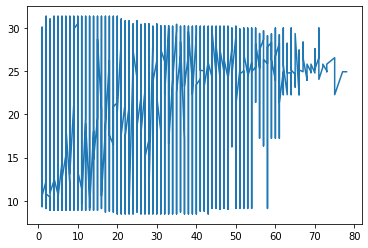

In [ ]:
plt.plot(y_t['Pickups'], y_t['preds'])

In [ ]:
print('Linear Regression Feature Weights')
print('-'*33)
for i in list(zip(lr.coef_, X_train.columns)):
    print('{:>15}: {:.2f}'.format(i[1], i[0]))

Linear Regression Feature Weights
---------------------------------
          month: 1.36
        weekday: -0.25
            day: 0.05
           hour: 0.88


# **Time Series - ARIMA (Used for forecasting pickups)**

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
uber_data.head()

,Date/Time,Lat,Lon,Base,Month,Day,Year,Hrs,Day_of_week,week_day_type
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,2014,0,Tuesday,weekday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,2014,0,Tuesday,weekday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,2014,0,Tuesday,weekday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,2014,0,Tuesday,weekday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,2014,0,Tuesday,weekday


In [ ]:
# Feature Engineering
def create_day_series(df):

    # Grouping by Date/Time to calculate number of trips
    day_df = pd.Series(df.groupby(['Date/Time']).size())
    # setting Date/Time as index
    day_df.index = pd.DatetimeIndex(day_df.index)
    # Resampling to daily trips
    day_df = day_df.resample('1D').apply(np.sum)

    return day_df

day_df_2014 = create_day_series(uber_data)
day_df_2014.head()

Date/Time
2014-04-01    14376
2014-04-02    17230
2014-04-03    20482
2014-04-04    26353
2014-04-05    19273
Freq: D, dtype: int64

p-value: 0.8354447352441179


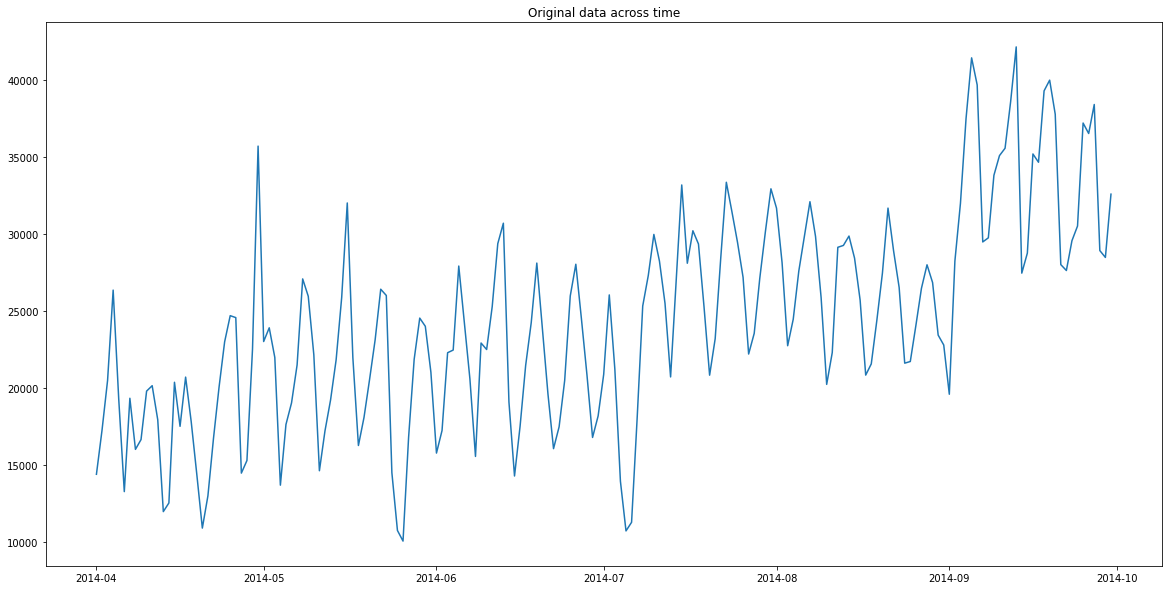

<Figure size 1440x720 with 0 Axes>

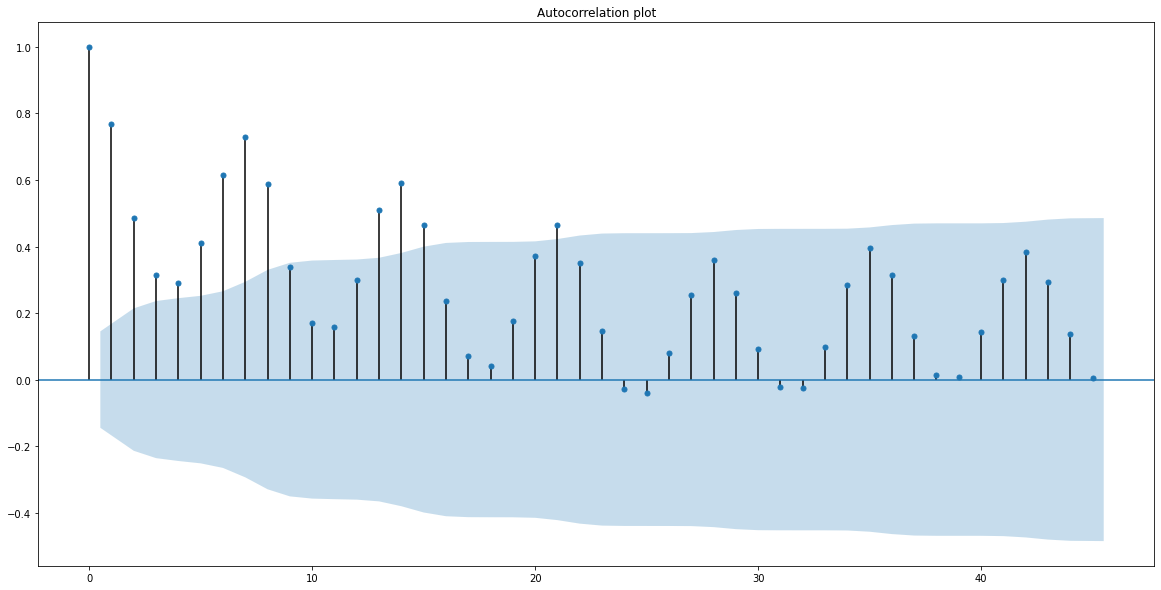

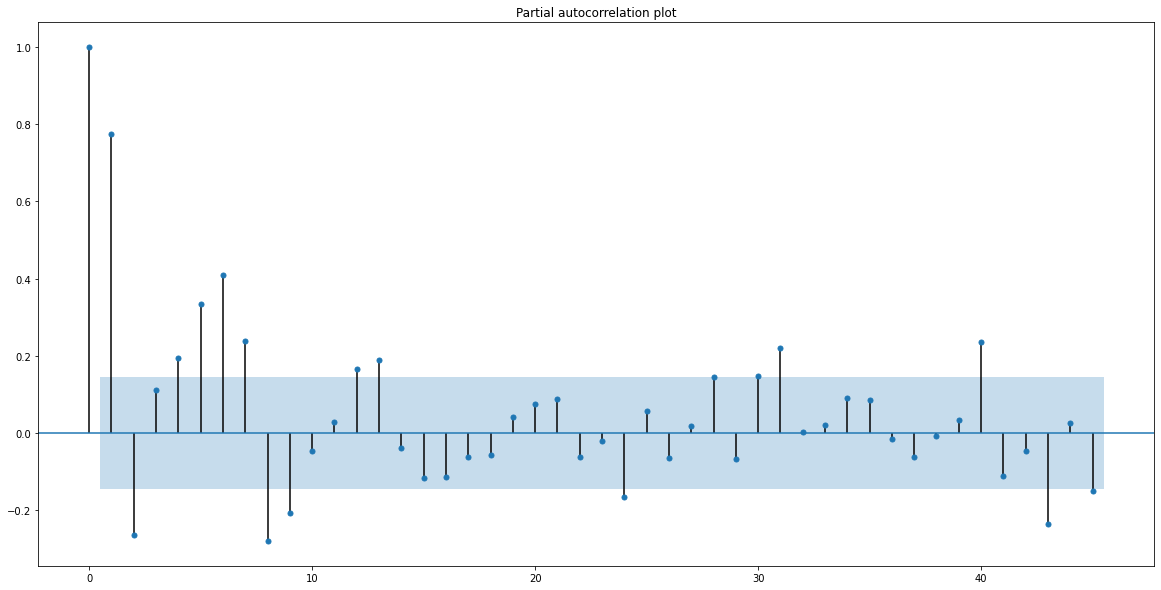

In [ ]:
#Checking trend and autocorrelation
def initial_plots(time_series, num_lag):

    #Original timeseries plot
    plt.figure(1)
    plt.plot(time_series)
    plt.title('Original data across time')
    plt.figure(2)
    plot_acf(time_series, lags = num_lag)
    plt.title('Autocorrelation plot')
    plot_pacf(time_series, lags = num_lag)
    plt.title('Partial autocorrelation plot')

    plt.show()


#Augmented Dickey-Fuller test for stationarity
#checking p-value
print('p-value: {}'.format(adfuller(day_df_2014)[1]))

#plotting
initial_plots(day_df_2014, 45)

In [ ]:
#storing differenced series
diff_series = day_df_2014.diff(periods=1)

#Augmented Dickey-Fuller test for stationarity
#checking p-value
print('p-value: {}'.format(adfuller(diff_series.dropna())[1]))

p-value: 1.3665758544271865e-08


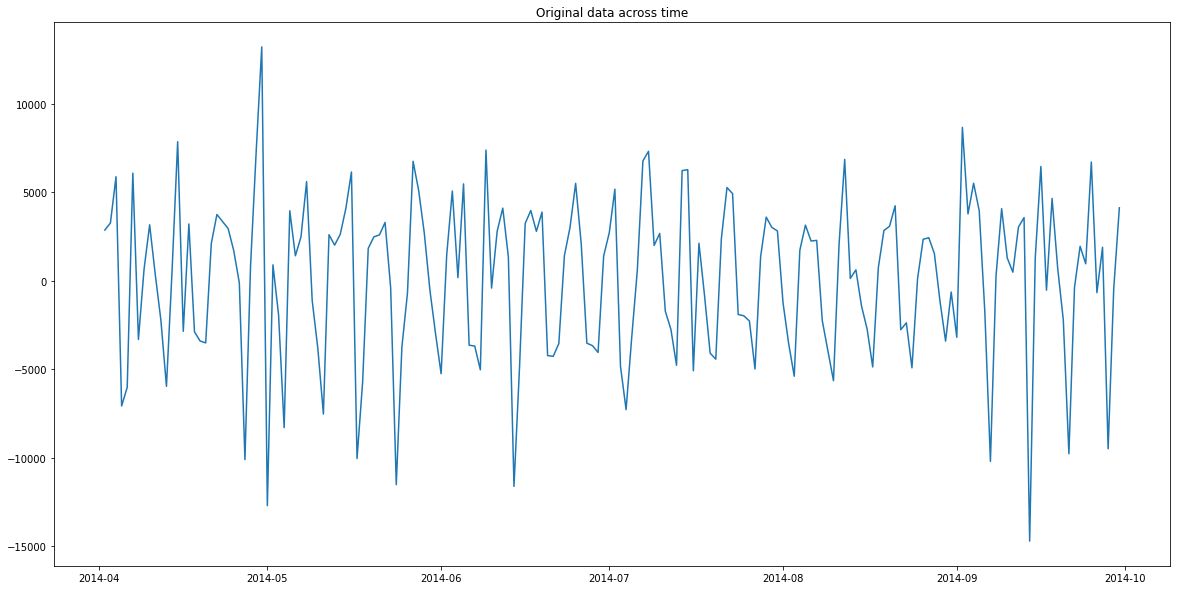

<Figure size 1440x720 with 0 Axes>

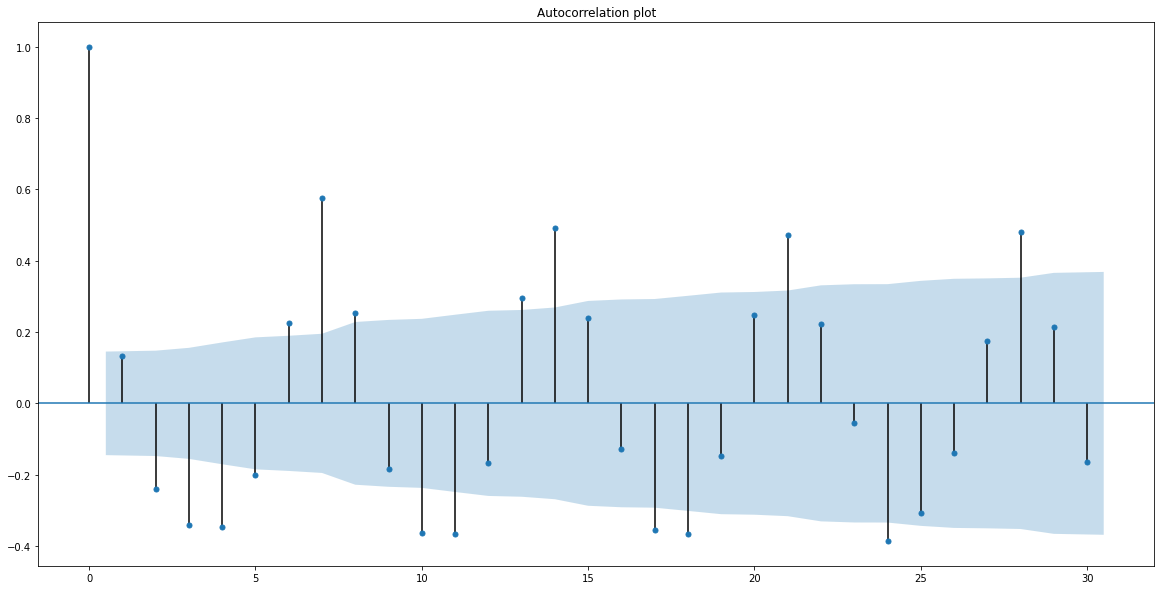

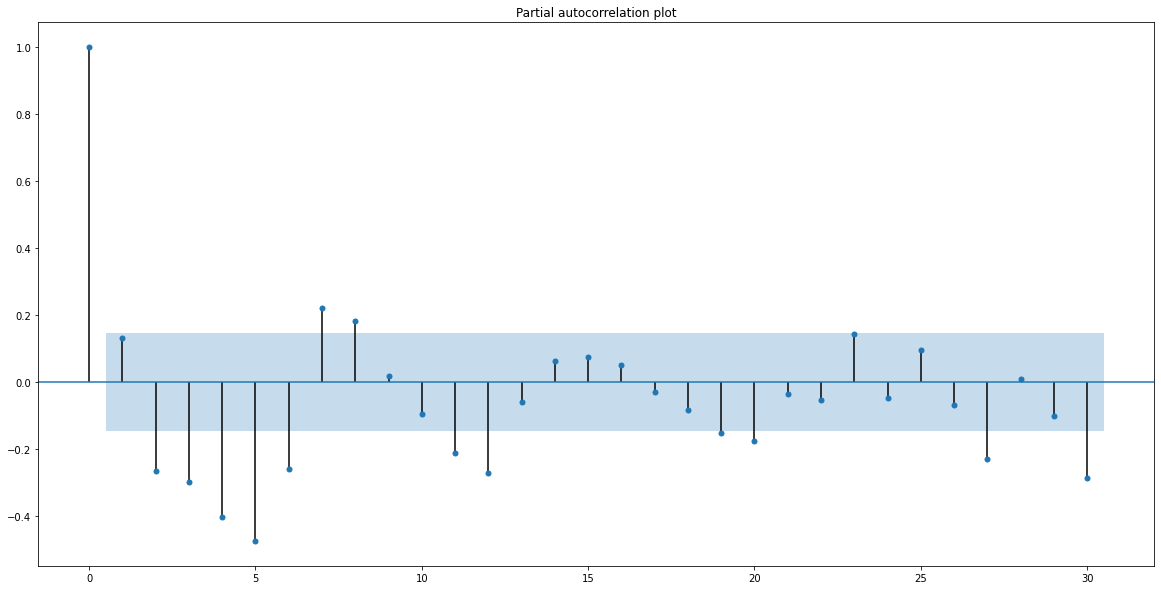

In [ ]:
initial_plots(diff_series.dropna(), 30)

In [ ]:
#Fitting the SARIMAX Model

In [ ]:
#Defining RMSE
def rmse(x,y):
    return sqrt(mean_squared_error(x,y))

#fitting ARIMA model on dataset
def SARIMAX_call(time_series,p_list,d_list,q_list,P_list,D_list,Q_list,s_list,test_period):

    #Splitting into training and testing
    training_ts = time_series[:-test_period]

    testing_ts = time_series[len(time_series)-test_period:]

    error_table = pd.DataFrame(columns = ['p','d','q','P','D','Q','s','AIC','BIC','RMSE'],\
                                                           index = range(len(ns_ar)*len(ns_diff)*len(ns_ma)*len(s_ar)\
                                                                         *len(s_diff)*len(s_ma)*len(s_list)))
    count = 0

    for p in p_list:
        for d in d_list:
            for q in q_list:
                for P in P_list:
                    for D in D_list:
                        for Q in Q_list:
                            for s in s_list:
                                #fitting the model
                                SARIMAX_model = SARIMAX(training_ts.astype(float),\
                                                        order=(p,d,q),\
                                                        seasonal_order=(P,D,Q,s),\
                                                        enforce_invertibility=False)
                                SARIMAX_model_fit = SARIMAX_model.fit(disp=0)
                                AIC = np.round(SARIMAX_model_fit.aic,2)
                                BIC = np.round(SARIMAX_model_fit.bic,2)
                                predictions = SARIMAX_model_fit.forecast(steps=test_period,typ='levels')
                                RMSE = rmse(testing_ts.values,predictions.values)

                                #populating error table
                                error_table['p'][count] = p
                                error_table['d'][count] = d
                                error_table['q'][count] = q
                                error_table['P'][count] = P
                                error_table['D'][count] = D
                                error_table['Q'][count] = Q
                                error_table['s'][count] = s
                                error_table['AIC'][count] = AIC
                                error_table['BIC'][count] = BIC
                                error_table['RMSE'][count] = RMSE

                                count+=1 #incrementing count

    #returning the fitted model and values
    return error_table

ns_ar = [0,1,2]
ns_diff = [1]
ns_ma = [0,1,2]
s_ar = [0,1]
s_diff = [0,1]
s_ma = [1,2]
s_list = [7]

error_table = SARIMAX_call(day_df_2014,ns_ar,ns_diff,ns_ma,s_ar,s_diff,s_ma,s_list,30)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dis

In [ ]:
# printing top 5 lowest RMSE from error table
error_table.sort_values(by='RMSE').head(5)

,p,d,q,P,D,Q,s,AIC,BIC,RMSE
5,0,1,0,1,0,2,7,2898.54,2910.63,4885.809724
3,0,1,0,0,1,2,7,2748.07,2757.0,4945.184008
7,0,1,0,1,1,2,7,2750.09,2762.0,4975.965055
6,0,1,0,1,1,1,7,2749.79,2758.72,5103.428418
2,0,1,0,0,1,1,7,2747.98,2753.93,5157.143962


FORECASTING

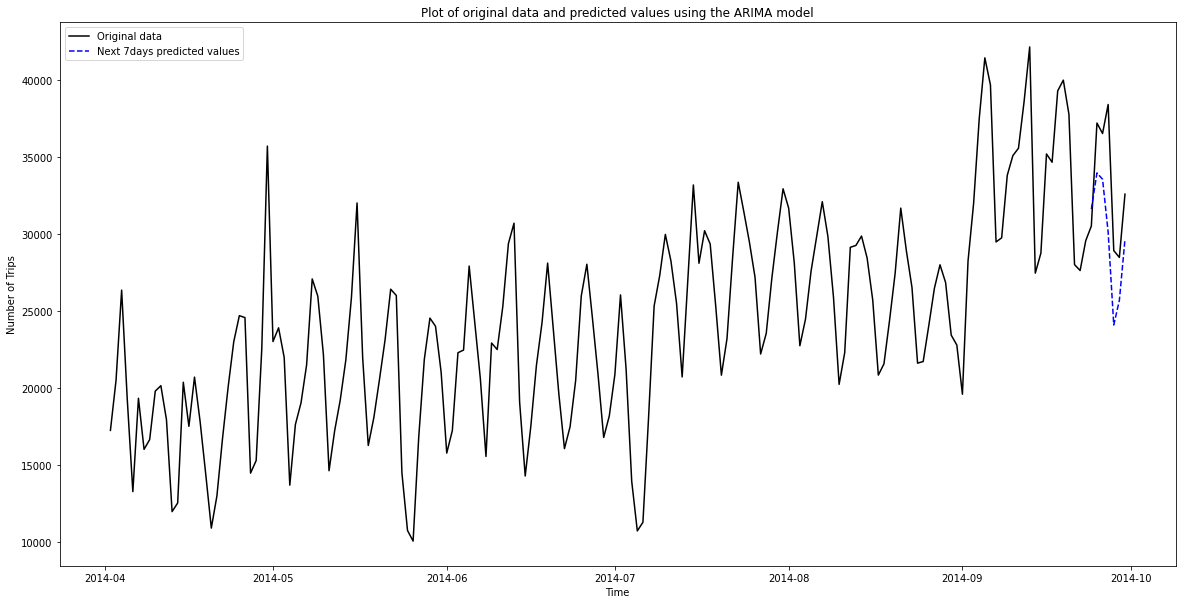

In [ ]:
#Predicting values using the fitted model
from datetime import timedelta
def predict(time_series,p,d,q,P,D,Q,s,n_days,conf):

    #Splitting into training and testing
    training_ts = time_series[:-n_days]

    testing_ts = time_series[len(time_series)-n_days:]

    #fitting the model
    SARIMAX_model = SARIMAX(training_ts.astype(float),\
                            order=(p,d,q),\
                            seasonal_order=(P,D,Q,s),\
                            enforce_invertibility=False)
    SARIMAX_model_fit = SARIMAX_model.fit(disp=0)

    #Predicting
    SARIMAX_prediction = pd.DataFrame(SARIMAX_model_fit.forecast(steps=n_days,alpha=(1-conf)).values,\
                          columns=['Prediction'])
    SARIMAX_prediction.index = pd.date_range(training_ts.index.max() + timedelta(days=1),periods=n_days)

    #Plotting
    plt.figure(4)
    plt.title('Plot of original data and predicted values using the ARIMA model')
    plt.xlabel('Time')
    plt.ylabel('Number of Trips')
    plt.plot(time_series[1:],'k-', label='Original data')
    plt.plot(SARIMAX_prediction,'b--', label='Next {}days predicted values'.format(n_days))
    plt.legend()
    plt.show()

    #Returning predicitons
    return SARIMAX_prediction

#Predicting the values and builing an 80% confidence interval
prediction = predict(day_df_2014,0,1,0,0,1,2,7,7,0.80)